In [ ]:
!pip install datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
df = load_dataset("legacy-datasets/banking77")

# Access the 'train' split (or 'test' or 'validation' if needed)
train_df = df["train"].to_pandas()  # Convert to pandas DataFrame

# Now you can use head()
train_df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/298k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/93.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


In [ ]:
import re
# Load the dataset and select the 'train' split (or any other split you need)
df = load_dataset("legacy-datasets/banking77")["train"].to_pandas()
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

# Assuming 'df' is your DataFrame and 'text' is the column containing text data
df['text_without_punctuation'] = df['text'].apply(remove_punctuation)

# Display the updated DataFrame
df.head()

,text,label,text_without_punctuation
0,I am still waiting on my card?,11,I am still waiting on my card
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...


In [ ]:
# Convert text to lowercase
df['text_lower'] = df['text_without_punctuation'].str.lower()

# Display the updated DataFrame
df.head()

,text,label,text_without_punctuation,text_lower
0,I am still waiting on my card?,11,I am still waiting on my card,i am still waiting on my card
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...,what can i do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...,i have been waiting over a week is the card st...
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...,can i track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...,how do i know if i will get my card or if it i...


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords to the lowercase text column
df['text_without_stopwords'] = df['text_lower'].apply(remove_stopwords)

# Display the updated DataFrame
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,text_without_punctuation,text_lower,text_without_stopwords
0,I am still waiting on my card?,11,I am still waiting on my card,i am still waiting on my card,still waiting card
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...,what can i do if my card still hasnt arrived a...,card still hasnt arrived 2 weeks
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...,i have been waiting over a week is the card st...,waiting week card still coming
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...,can i track my card while it is in the process...,track card process delivery
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...,how do i know if i will get my card or if it i...,know get card lost


In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

def stem_text(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)  # Join stemmed words back into a string

# Apply stemming to your preprocessed text column
df['text_stemmed'] = df['text_without_stopwords'].apply(stem_text)

# Display the updated DataFrame
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,label,text_without_punctuation,text_lower,text_without_stopwords,text_stemmed
0,I am still waiting on my card?,11,I am still waiting on my card,i am still waiting on my card,still waiting card,still wait card
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...,what can i do if my card still hasnt arrived a...,card still hasnt arrived 2 weeks,card still hasnt arriv 2 week
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...,i have been waiting over a week is the card st...,waiting week card still coming,wait week card still come
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...,can i track my card while it is in the process...,track card process delivery,track card process deliveri
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...,how do i know if i will get my card or if it i...,know get card lost,know get card lost


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the 'averaged_perceptron_tagger' data package, specifically for English
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()

    # Function to get wordnet pos tag
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN) # Default to noun if not found

    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Lemmatize each word with its appropriate POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

    return ' '.join(lemmatized_words)  # Join lemmatized words back into a string

# Apply lemmatization to your preprocessed text column
df['text_lemmatized'] = df['text_without_stopwords'].apply(lemmatize_text)

# Display the updated DataFrame
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,label,text_without_punctuation,text_lower,text_without_stopwords,text_stemmed,text_lemmatized
0,I am still waiting on my card?,11,I am still waiting on my card,i am still waiting on my card,still waiting card,still wait card,still wait card
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...,what can i do if my card still hasnt arrived a...,card still hasnt arrived 2 weeks,card still hasnt arriv 2 week,card still hasnt arrive 2 week
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...,i have been waiting over a week is the card st...,waiting week card still coming,wait week card still come,wait week card still come
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...,can i track my card while it is in the process...,track card process delivery,track card process deliveri,track card process delivery
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...,how do i know if i will get my card or if it i...,know get card lost,know get card lost,know get card lose


In [ ]:
!pip install fasttext

import fasttext
import numpy as np

# Assuming 'text_lemmatized' column in your DataFrame contains preprocessed text
text_data = df['text_lemmatized'].str.cat(sep=' ')  # Concatenate all text into a single string

# Save the text data to a temporary file
with open('temp_text.txt', 'w') as f:
    f.write(text_data)

# Train FastText model using the temporary file
model_fasttext = fasttext.train_unsupervised('temp_text.txt', model='skipgram', dim=100)

# Function to create sentence embeddings by averaging word embeddings
def create_sentence_embedding(text):
    words = text.split()
    embeddings = [model_fasttext.get_word_vector(word) for word in words]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)

# Apply the function to your text data
df['fasttext_embedding'] = df['text_lemmatized'].apply(create_sentence_embedding)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313472 sha256=ff170ba9d4fc1a32148a328394576fefd21abb606770ac3f0975a6d2700c5a8f
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


,text,label,text_without_punctuation,text_lower,text_without_stopwords,text_stemmed,text_lemmatized,fasttext_embedding
0,I am still waiting on my card?,11,I am still waiting on my card,i am still waiting on my card,still waiting card,still wait card,still wait card,"[-0.05346642, 0.049082335, -0.06296027, -0.227..."
1,What can I do if my card still hasn't arrived ...,11,What can I do if my card still hasnt arrived a...,what can i do if my card still hasnt arrived a...,card still hasnt arrived 2 weeks,card still hasnt arriv 2 week,card still hasnt arrive 2 week,"[-0.025018776, 0.037596744, -0.052324012, -0.2..."
2,I have been waiting over a week. Is the card s...,11,I have been waiting over a week Is the card st...,i have been waiting over a week is the card st...,waiting week card still coming,wait week card still come,wait week card still come,"[-0.024247423, 0.04017203, -0.04614773, -0.261..."
3,Can I track my card while it is in the process...,11,Can I track my card while it is in the process...,can i track my card while it is in the process...,track card process delivery,track card process deliveri,track card process delivery,"[-0.11193083, 0.068958476, -0.063787036, -0.20..."
4,"How do I know if I will get my card, or if it ...",11,How do I know if I will get my card or if it i...,how do i know if i will get my card or if it i...,know get card lost,know get card lost,know get card lose,"[-0.07586075, 0.036640003, -0.012725325, -0.21..."


In [ ]:
# Assuming 'fasttext_embedding' is the column containing the embeddings
embeddings = df['fasttext_embedding'].to_list()
import ast  # For evaluating strings as Python literals

embeddings = [np.array(ast.literal_eval(x)) if isinstance(x, str) else x for x in embeddings]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all pairs of embeddings
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
# Example: Find most similar sentences to the first sentence
target_sentence_index = 0
similarities_to_target = similarity_matrix[target_sentence_index]
most_similar_indices = similarities_to_target.argsort()[-5:][::-1]  # Top 5 most similar (excluding itself)

for index in most_similar_indices:
  if index != target_sentence_index:  # Exclude the target sentence itself
    print(f"Sentence {index}: {df['text_lemmatized'][index]} (Similarity: {similarities_to_target[index]:.4f})")

Sentence 61: still wait card (Similarity: 1.0000)
Sentence 9: order card still isnt (Similarity: 0.9987)
Sentence 23: card isnt yet (Similarity: 0.9984)
Sentence 3064: long wait see virtual card order (Similarity: 0.9982)


In [ ]:
import numpy as np

# Assuming 'similarity_matrix' is your cosine similarity matrix
overall_similarity = np.mean(similarity_matrix)

print(f"Overall Cosine Similarity: {overall_similarity:.4f}")

Overall Cosine Similarity: 0.8563


In [ ]:
!pip install qdrant-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.7/306.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6


In [ ]:
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct
import pandas as pd

In [ ]:
# Create a Qdrant client
client = QdrantClient(":memory:")  # Or specify your Qdrant server address

# Define collection name and vector size
collection_name = "my_collection"
vector_size = 100  # Adjust based on your embedding size

# Create a collection
client.recreate_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=100, distance=Distance.COSINE),
)

<ipython-input-15-c8aa7c59aed8>:9: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


True

In [ ]:
# Assuming 'df' is your DataFrame with 'text' and 'label' columns
points = []
for index, row in df.iterrows():
    text = row['text']
    label = row['label']

    # Generate embedding for the text (replace with your embedding function)
    # embedding = your_embedding_function(text)
    embedding = row['fasttext_embedding']

    # Create payload
    payload = {"text": text, "intent": label}

    # Create PointStruct object
    point = PointStruct(id=index, vector=embedding.tolist(), payload=payload)
    points.append(point)

# Upsert points to Qdrant
client.upsert(collection_name=collection_name, points=points)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [ ]:
def search_qdrant(query_text, top_k=5):
    """Searches the Qdrant collection for similar texts.

    Args:
        query_text: The text to search for.
        top_k: The number of top results to return.

    Returns:
        A list of search results, each containing payload, score, intent, and query.
    """
    import pandas as pd

    # Load the label-intent mapping file
    intent_mapping_file = "/content/intent.xlsx"  # Replace with the actual file path
    intent_data = pd.read_excel(intent_mapping_file)

    # Create a label-to-intent mapping dictionary
    label_to_intent = {
        row['label']: row['intent (category)'] for _, row in intent_data.iterrows()
    }

    def create_fasttext_embedding(text):
        words = text.split()
        embeddings = [model_fasttext.get_word_vector(word) for word in words if word in model_fasttext]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(100)

    query_embedding = create_fasttext_embedding(query_text)
    # No need to reshape for Qdrant, convert to list
    query_embedding = query_embedding.tolist()

    search_result = client.search(
        collection_name=collection_name,
        query_vector=query_embedding,
        limit=top_k,
    )

    results = []
    for hit in search_result:
        label = hit.payload.get("intent")
        intent = label_to_intent.get(label, "Unknown")
        results.append({
            "payload": hit.payload,
            "similarity": hit.score,
            "intent": intent,
            "query": query_text,
        })
    return results

# Get input from the user
user_query = input("Enter your query: ")

# Perform the search
search_results = search_qdrant(user_query)

# Display results in a readable format
print("\nSearch Results:")
for result in search_results:
    print(f"Query: {result['query']}")
    print(f"Intent: {result['intent']}")
    print(f"Similarity: {result['similarity']}")
    print(f"Payload: {result['payload']}")
    print("-" * 20)  # Separator between results

Enter your query: I forgot my code to get into the app.

Search Results:
Query: I forgot my code to get into the app.
Intent: passcode_forgotten
Similarity: 0.9985399579708621
Payload: {'text': 'My passcode was denied.', 'intent': 44}
--------------------
Query: I forgot my code to get into the app.
Intent: passcode_forgotten
Similarity: 0.9967054342853666
Payload: {'text': 'passcode retrieval', 'intent': 44}
--------------------
Query: I forgot my code to get into the app.
Intent: passcode_forgotten
Similarity: 0.9962280052623594
Payload: {'text': 'I have forgotten my passcode', 'intent': 44}
--------------------
Query: I forgot my code to get into the app.
Intent: passcode_forgotten
Similarity: 0.9962280052623594
Payload: {'text': 'What do I do if I have forgotten my passcode?', 'intent': 44}
--------------------
Query: I forgot my code to get into the app.
Intent: passcode_forgotten
Similarity: 0.9955199488566473
Payload: {'text': 'I need to reset the passcode.', 'intent': 44}
-----

<ipython-input-18-66191c2e9d9b>:34: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_result = client.search(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from qdrant_client import QdrantClient, models

# Assuming your data is in a Pandas DataFrame called 'df'
# with columns like 'text', 'label', and 'fasttext_embedding'

# Choose your split ratio: 80/20 or 70/30
split_ratio = 0.7  # For 70/30 split, use 0.7; for 80/20, use 0.8

# Split the data into training and testing sets
train_df, test_df = train_test_split(
    df, test_size=1 - split_ratio, random_state=42
)  # Adjust random_state as needed

# Create Qdrant client and collection
client = QdrantClient(":memory:")
collection_name = "my_collection"
vector_size = 100  # Adjust based on your embedding size

client.recreate_collection(
    collection_name=collection_name,
    vectors_config=models.VectorParams(size=vector_size, distance=models.Distance.COSINE),
)

# Upsert training data into Qdrant
points = []
for index, row in train_df.iterrows():
    embedding = row['fasttext_embedding'].tolist()  # Assuming 'fasttext_embedding' column
    payload = {"text": row['text'], "intent": row['label']}
    point = models.PointStruct(id=index, vector=embedding, payload=payload)
    points.append(point)

client.upsert(collection_name=collection_name, points=points)

# Testing with search and adding notes
results = []
for index, row in test_df.iterrows():
    query_text = row['text']
    actual_intent = row['label']

    # Search in Qdrant
    search_result = client.search(
        collection_name=collection_name,
        query_vector=row['fasttext_embedding'].tolist(),
        limit=1,
    )

    predicted_intent = search_result[0].payload.get("intent") if search_result else None

    results.append(
        {
            "query": query_text,
            "actual": actual_intent,
            "search": predicted_intent,
            "intent": predicted_intent,  # 'intent' and 'search' are the same
            "predict": predicted_intent,  # 'predict' and 'search' are the same
        }
    )

results_df = pd.DataFrame(results)
print(results_df)

<ipython-input-19-53681cda96a0>:21: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(
<ipython-input-19-53681cda96a0>:43: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_result = client.search(


                                                  query  actual  search  \
0        Is it possible for me to change my PIN number?      21      21   
1                  I'm not sure why my card didn't work      25      25   
2                        I don't think my top up worked      59      61   
3     Can you explain why my payment was charged a fee?      15      34   
4     How long does a transfer from a UK account tak...       5      48   
...                                                 ...     ...     ...   
2996  When I tried to top up using my card, all of t...      62      62   
2997                                I got charged twice      63      34   
2998                     can you express my card to me?      12      10   
2999                      I want to get a virtual card!      40      40   
3000            I did not get my virtual card yet, Why?      40      43   

      intent  predict  
0         21       21  
1         25       25  
2         61       61  
3  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'results_df' is the DataFrame containing your search results

# Extract actual and predicted intents
actual_intents = results_df['actual'].tolist()
predicted_intents = results_df['predict'].tolist()

# Calculate metrics
accuracy = accuracy_score(actual_intents, predicted_intents)
precision = precision_score(actual_intents, predicted_intents, average='weighted')  # or 'micro', 'macro'
recall = recall_score(actual_intents, predicted_intents, average='weighted')  # or 'micro', 'macro'
f1 = f1_score(actual_intents, predicted_intents, average='weighted')  # or 'micro', 'macro'

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6251249583472176
Precision: 0.639070280756745
Recall: 0.6251249583472176
F1 Score: 0.6269260340116147


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'results_df' is the DataFrame containing your search results

# Extract actual and predicted intents
actual_intents = results_df['actual'].tolist()
predicted_intents = results_df['predict'].tolist()

# Generate confusion matrix
cm = confusion_matrix(actual_intents, predicted_intents)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(actual_intents, predicted_intents)

# Print classification report
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[26  0  0 ...  0  0  0]
 [ 0 30  0 ...  1  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 30  1]
 [ 0  0  0 ...  0  1 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69        42
           1       0.88      0.71      0.79        42
           2       0.80      0.82      0.81        34
           3       0.77      0.42      0.54        24
           4       0.78      0.79      0.78        39
           5       0.61      0.52      0.56        54
           6       0.68      0.62      0.65        55
           7       0.54      0.55      0.54        40
           8       0.51      0.45      0.48        53
           9       0.79      0.78      0.78        40
          10       0.71      0.42      0.53        24
          11       0.63      0.61      0.62        59
          12       0.61      0.46      0.52        37
          13       0.47      0.68      0.55  

<ipython-input-22-b5ecab2143e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


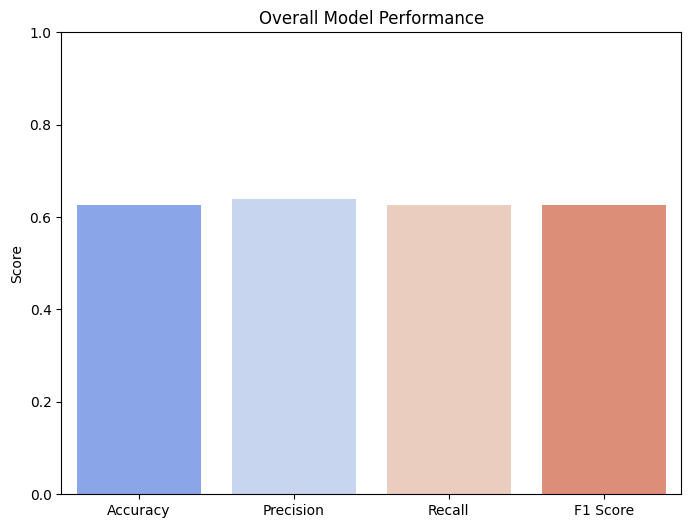

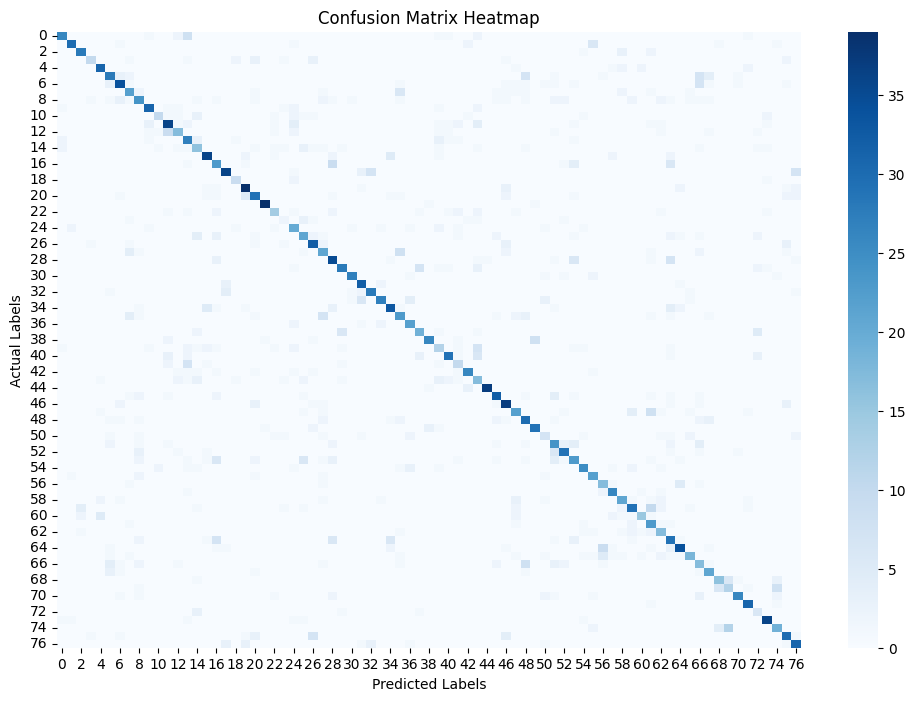

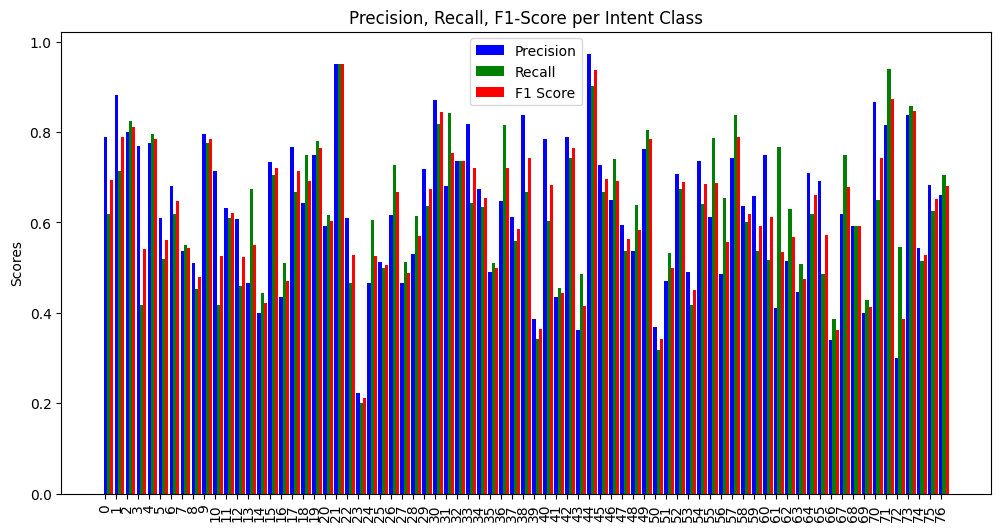

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-22-b5ecab2143e8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


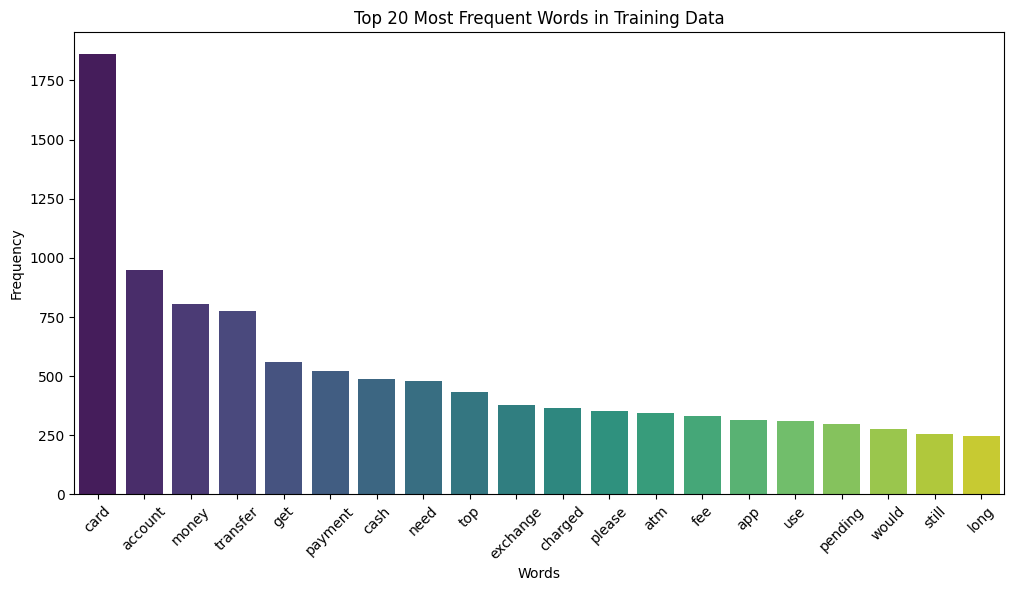

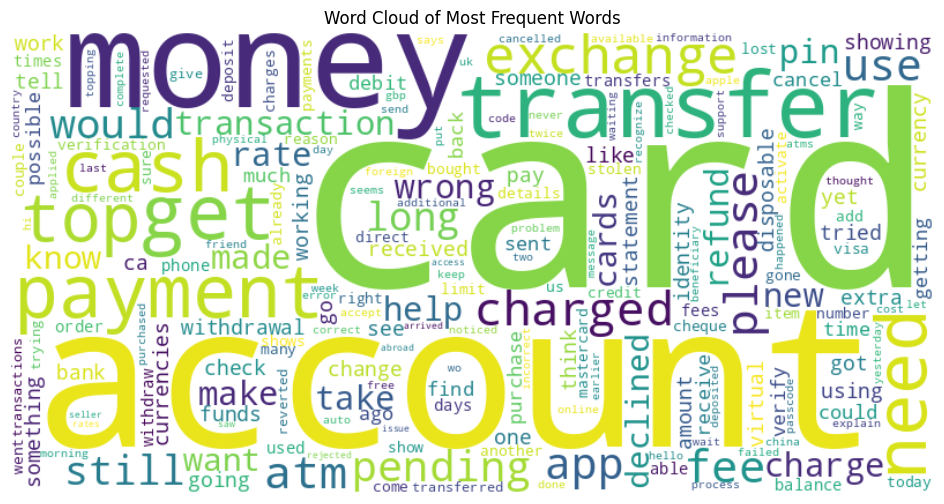

In [ ]:
# ------------------ Plot Accuracy, Precision, Recall, F1 ------------------
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Overall Model Performance")
plt.show()

# ------------------ Confusion Matrix Heatmap ------------------
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap="Blues", fmt="d", annot=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

# ------------------ Classification Report (Graphical Representation) ------------------
report = classification_report(actual_intents, predicted_intents, output_dict=True)

# Extract class-wise metrics
labels = list(report.keys())[:-3]  # Excluding 'accuracy', 'macro avg', 'weighted avg'
precision_scores = [report[label]["precision"] for label in labels]
recall_scores = [report[label]["recall"] for label in labels]
f1_scores = [report[label]["f1-score"] for label in labels]

# Bar Chart for Precision, Recall, F1-Score per Class
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(labels))

ax.bar(x, precision_scores, width=0.3, label="Precision", color="blue", align="center")
ax.bar(x + 0.3, recall_scores, width=0.3, label="Recall", color="green", align="center")
ax.bar(x + 0.6, f1_scores, width=0.3, label="F1 Score", color="red", align="center")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Scores")
ax.set_title("Precision, Recall, F1-Score per Intent Class")
ax.legend()

plt.show()

# ------------------ Word Frequency Distribution Graphs ------------------
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
all_words = []

for text in train_df['text']:  # Access the 'text' column using string index
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)
# Word frequency count
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Bar Chart of Top 20 Most Frequent Words
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Training Data")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()


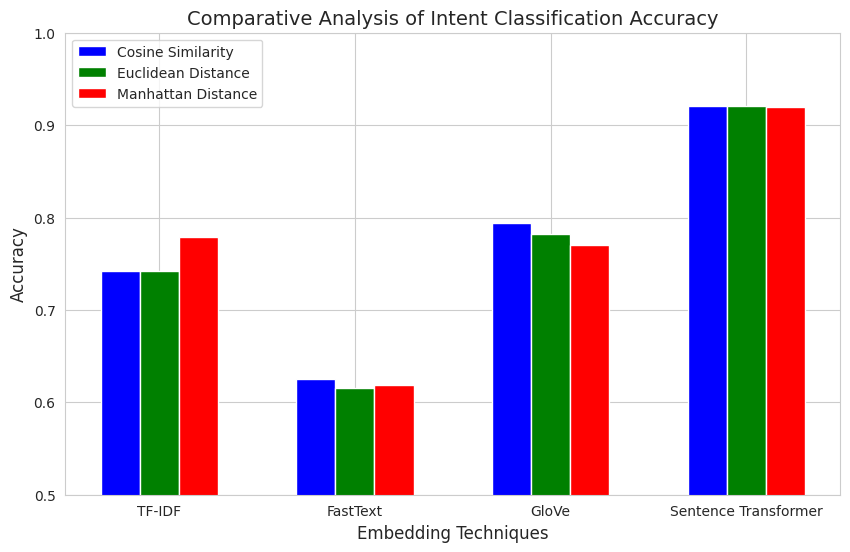

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define embedding techniques and accuracy values for each similarity measure
embedding_techniques = ['TF-IDF', 'FastText', 'GloVe', 'Sentence Transformer']
cosine_accuracy = [0.7418, 0.6251, 0.7942, 0.9205]
euclidean_accuracy = [0.7417, 0.6154, 0.7825, 0.9202]
manhattan_accuracy = [0.7786, 0.6184, 0.7708, 0.9198]

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(embedding_techniques))

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.bar(x, cosine_accuracy, width=bar_width, label='Cosine Similarity', color='blue')
plt.bar(x + bar_width, euclidean_accuracy, width=bar_width, label='Euclidean Distance', color='green')
plt.bar(x + 2 * bar_width, manhattan_accuracy, width=bar_width, label='Manhattan Distance', color='red')

# Add labels and title
plt.xlabel('Embedding Techniques', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparative Analysis of Intent Classification Accuracy', fontsize=14)
plt.xticks(x + bar_width, embedding_techniques)
plt.ylim(0.5, 1)  # Set y-axis limit to visualize differences clearly
plt.legend()

# Show the plot
plt.show()


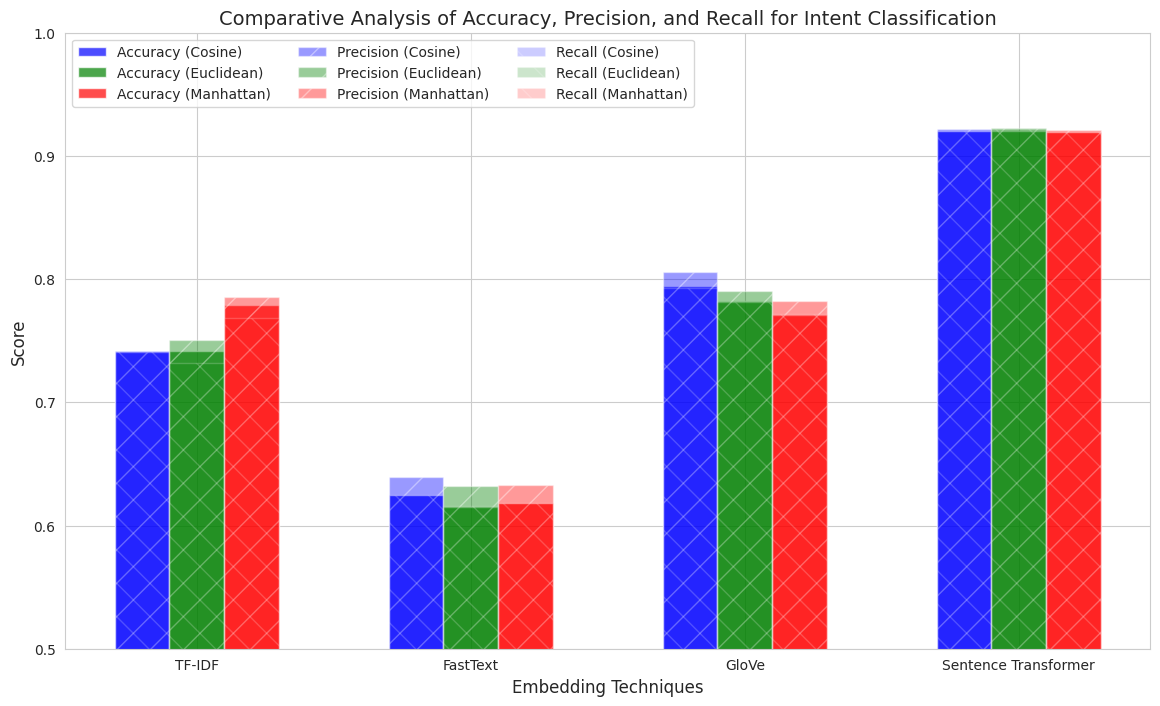

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define embedding techniques
embedding_techniques = ['TF-IDF', 'FastText', 'GloVe', 'Sentence Transformer']

# Define accuracy, precision, and recall values for each similarity measure
cosine_metrics = {
    'Accuracy': [0.7418, 0.6251, 0.7942, 0.9205],
    'Precision': [0.7406, 0.6390, 0.8061, 0.9220],
    'Recall': [0.7417, 0.6251, 0.7925, 0.9205]
}

euclidean_metrics = {
    'Accuracy': [0.7417, 0.6154, 0.7825, 0.9202],
    'Precision': [0.7506, 0.6317, 0.7901, 0.9223],
    'Recall': [0.7317, 0.6155, 0.7812, 0.9215]
}

manhattan_metrics = {
    'Accuracy': [0.7786, 0.6184, 0.7708, 0.9198],
    'Precision': [0.7858, 0.6328, 0.7820, 0.9214],
    'Recall': [0.7686, 0.6184, 0.7713, 0.9198]
}

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(embedding_techniques))

# Create the figure
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot Accuracy
plt.bar(x - bar_width, cosine_metrics['Accuracy'], width=bar_width, label='Accuracy (Cosine)', color='blue', alpha=0.7)
plt.bar(x, euclidean_metrics['Accuracy'], width=bar_width, label='Accuracy (Euclidean)', color='green', alpha=0.7)
plt.bar(x + bar_width, manhattan_metrics['Accuracy'], width=bar_width, label='Accuracy (Manhattan)', color='red', alpha=0.7)

# Plot Precision
plt.bar(x - bar_width, cosine_metrics['Precision'], width=bar_width, label='Precision (Cosine)', color='blue', alpha=0.4, hatch='/')
plt.bar(x, euclidean_metrics['Precision'], width=bar_width, label='Precision (Euclidean)', color='green', alpha=0.4, hatch='/')
plt.bar(x + bar_width, manhattan_metrics['Precision'], width=bar_width, label='Precision (Manhattan)', color='red', alpha=0.4, hatch='/')

# Plot Recall
plt.bar(x - bar_width, cosine_metrics['Recall'], width=bar_width, label='Recall (Cosine)', color='blue', alpha=0.2, hatch='\\')
plt.bar(x, euclidean_metrics['Recall'], width=bar_width, label='Recall (Euclidean)', color='green', alpha=0.2, hatch='\\')
plt.bar(x + bar_width, manhattan_metrics['Recall'], width=bar_width, label='Recall (Manhattan)', color='red', alpha=0.2, hatch='\\')

# Add labels and title
plt.xlabel('Embedding Techniques', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparative Analysis of Accuracy, Precision, and Recall for Intent Classification', fontsize=14)
plt.xticks(x, embedding_techniques)
plt.ylim(0.5, 1)  # Set y-axis limit for better visualization
plt.legend(ncol=3, fontsize=10, loc='upper left')

# Show the plot
plt.show()


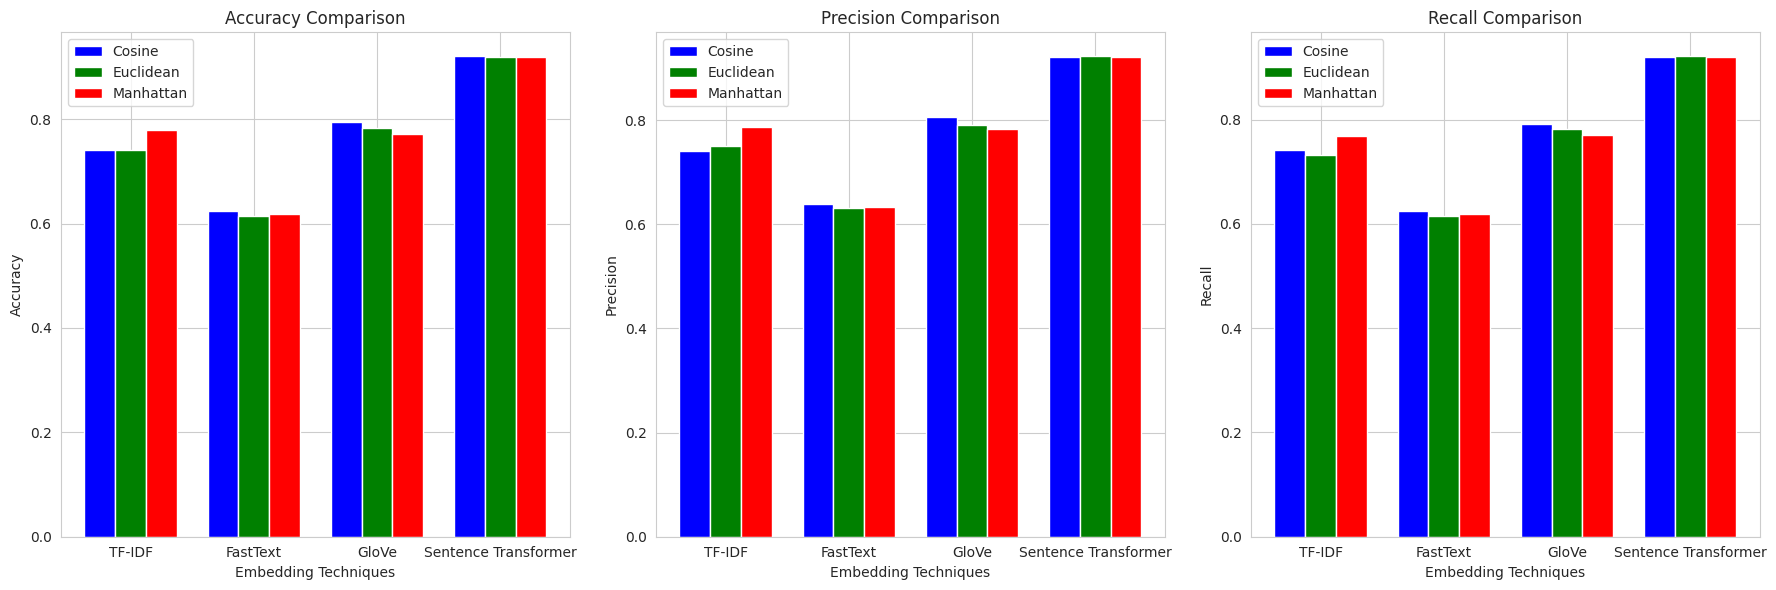

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define embedding techniques
embedding_techniques = ['TF-IDF', 'FastText', 'GloVe', 'Sentence Transformer']

# Accuracy values for each similarity measure
accuracy_values = {
    'Cosine': [0.7418, 0.6251, 0.7942, 0.9205],
    'Euclidean': [0.7417, 0.6154, 0.7825, 0.9202],
    'Manhattan': [0.7786, 0.6184, 0.7708, 0.9198]
}

# Precision values for each similarity measure
precision_values = {
    'Cosine': [0.7406, 0.6390, 0.8061, 0.9220],
    'Euclidean': [0.7506, 0.6317, 0.7901, 0.9223],
    'Manhattan': [0.7858, 0.6328, 0.7820, 0.9214]
}

# Recall values for each similarity measure
recall_values = {
    'Cosine': [0.7417, 0.6251, 0.7925, 0.9205],
    'Euclidean': [0.7317, 0.6155, 0.7812, 0.9215],
    'Manhattan': [0.7686, 0.6184, 0.7713, 0.9198]
}

# Define bar width and x locations
bar_width = 0.25
x = np.arange(len(embedding_techniques))

# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots for Accuracy, Precision, and Recall
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy Plot
axes[0].bar(x - bar_width, accuracy_values['Cosine'], width=bar_width, label='Cosine', color='blue')
axes[0].bar(x, accuracy_values['Euclidean'], width=bar_width, label='Euclidean', color='green')
axes[0].bar(x + bar_width, accuracy_values['Manhattan'], width=bar_width, label='Manhattan', color='red')
axes[0].set_title('Accuracy Comparison')
axes[0].set_xlabel('Embedding Techniques')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(embedding_techniques)
axes[0].legend()

# Precision Plot
axes[1].bar(x - bar_width, precision_values['Cosine'], width=bar_width, label='Cosine', color='blue')
axes[1].bar(x, precision_values['Euclidean'], width=bar_width, label='Euclidean', color='green')
axes[1].bar(x + bar_width, precision_values['Manhattan'], width=bar_width, label='Manhattan', color='red')
axes[1].set_title('Precision Comparison')
axes[1].set_xlabel('Embedding Techniques')
axes[1].set_ylabel('Precision')
axes[1].set_xticks(x)
axes[1].set_xticklabels(embedding_techniques)
axes[1].legend()

# Recall Plot
axes[2].bar(x - bar_width, recall_values['Cosine'], width=bar_width, label='Cosine', color='blue')
axes[2].bar(x, recall_values['Euclidean'], width=bar_width, label='Euclidean', color='green')
axes[2].bar(x + bar_width, recall_values['Manhattan'], width=bar_width, label='Manhattan', color='red')
axes[2].set_title('Recall Comparison')
axes[2].set_xlabel('Embedding Techniques')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(x)
axes[2].set_xticklabels(embedding_techniques)
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
